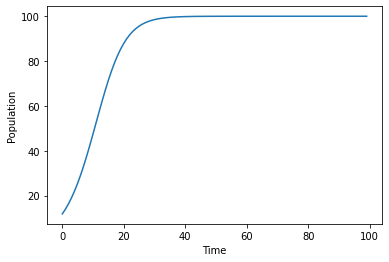

In [ ]:
#lec32

#Stochastic Logistic Growth Model
import matplotlib.pyplot as plt

# first do deterministic solution (as we have before)
N = 10
r = 0.2
K = 100
Y = [] # population count
for i in range(0,100):
    lamb = N + r*N*(1-N/K) #this is the expected value of N
    N = lamb
    Y.append(N)

plt.plot(Y)
plt.ylabel('Population')
plt.xlabel('Time')
#plt.savefig('lec30fig1a.png', bbox_inches='tight')
plt.show()


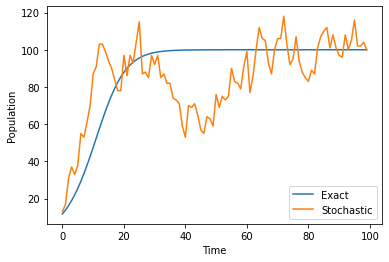

In [ ]:
# now do it stochastically
import numpy as np
from numpy.random import poisson

# set the random number generator seed
np.random.seed(30)
Nexact = 10
Nstoch = 10
r = 0.2
K = 100
Yexact = [] # population count for the deterministic model
Ystoch = [] # for the stochastic model
for i in range(0,100):
    lamb = Nexact + r*Nexact*(1-Nexact/K) #this is the expected value of N
    Nexact = lamb
    Yexact.append(Nexact)
    lamb = Nstoch + r*Nstoch*(1-Nstoch/K) #expected value using previous
    Nstoch = poisson(lamb) # value we sampled for this time point
    Ystoch.append(Nstoch)

plt.plot(Yexact, label="Exact")
plt.plot(Ystoch, label="Stochastic")
plt.ylabel('Population')
plt.xlabel('Time')
plt.legend()
#plt.savefig('lec30fig1b.png', bbox_inches='tight')
plt.show()

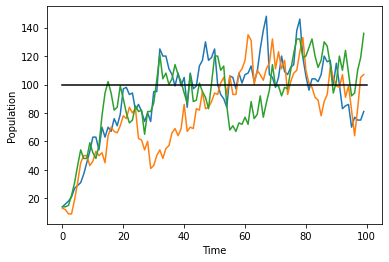

In [ ]:
# do the same thing multiple times
Ngen = 100
for j in range(0,3):
    N = 10
    Y = [] # store population count
    for i in range(0,Ngen):
        lamb = N + r*N*(1-N/K);
        N = poisson(lamb)
        Y.append(N)
    plt.plot(Y)
Yavg = [(0,Ngen),(K,K)]
plt.plot(Yavg[0],Yavg[1],'k-')
plt.ylabel('Population')
plt.xlabel('Time')
#plt.savefig('lec30fig1c.png', bbox_inches='tight')
plt.show()

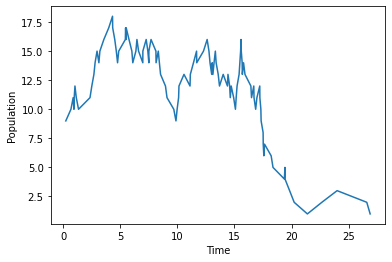

In [ ]:
#Stochastic Birth Death Model

from numpy.random import exponential, random

N = 10 # initial pop size
b = 0.23 # birth rate
d = 0.22 # death rate
X = [] # time vector
Y = [] # pop size vector
t = 0 # initial time

#notice not using a for loop since t does not increment evenly
while t < 200:
    lamb = (b+d)*N
    dt = exponential(1.0/lamb)  # Beta = 1.0/lambda
    if random() < (b/(b+d)):
        N = N + 1 # a birth
    else:
        N = N - 1 # a death
    if N < 1:
      	break
    else:
    	t = t + dt;
    	X.append(t)
    	Y.append(N)

plt.plot(X, Y)
plt.ylabel('Population')
plt.xlabel('Time')
#plt.savefig('lec30fig2.png', bbox_inches='tight')
plt.show()


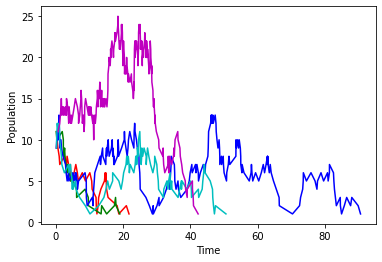

In [ ]:
b = 0.23 # birth rate
d = 0.22 # death rate
colors=['r','g','b','c','m','y']

for ntrial in range(0,5):
    N = 10 # initial pop size
    t = 0 # initial time
    X = [] # time vector
    Y = [] # pop size vector

    #notice not using a for loop since t does not increment evenly
    while t < 200:
        lamb = (b+d)*N
        dt = exponential(1.0/lamb)  # Beta = 1.0/lambda
        if random() < (b/(b+d)):
            N = N + 1 # a birth
        else:
            N = N - 1 # a death
        if N < 1:
      	    break
        else:
    	    t = t + dt;
    	    X.append(t)
    	    Y.append(N)
    plt.plot(X, Y, colors[ntrial])
plt.ylabel('Population')
plt.xlabel('Time')
#plt.savefig('lec30fig2b.png', bbox_inches='tight')
plt.show()
